<a href="https://colab.research.google.com/github/tanvir362/SensorTranslation/blob/master/SensorTranslation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#mounting drive for data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#reading prepared data from csv
import pandas as pd
import numpy as np
cpath = "/content/drive/My Drive/Colab Notebooks/SensorTranslation/"

data = pd.read_csv(cpath+"S_T_Final_data.csv", index_col=False)
data.head()

Temperature  DewPoint  WindSpeed  Pressure  Humidity
0           47        46          0     29.27      0.95
1           47        46          0     29.26      0.95
2           47        46          0     29.31      0.95
3           64        52          0     29.33      0.64
4           70        52          0     29.26      0.54

In [0]:
data.corr()

Temperature  DewPoint  WindSpeed  Pressure  Humidity
Temperature     1.000000  0.492293   0.359385 -0.087820 -0.642217
DewPoint        0.492293  1.000000  -0.020435 -0.047171  0.128739
WindSpeed       0.359385 -0.020435   1.000000 -0.015098 -0.342736
Pressure       -0.087820 -0.047171  -0.015098  1.000000  0.074207
Humidity       -0.642217  0.128739  -0.342736  0.074207  1.000000

In [0]:
#imports for the network
from keras.models import Sequential
from keras.layers import *
import numpy as np

Using TensorFlow backend.


In [0]:
#building the network
model = Sequential()
lyr1 = Dense(8, input_shape=(4,))
lyr2 = Dense(units=8)
lyr3 = Dense(8)
lyr4 = Dense(8)
lyr5 = Dense(1)

model.add(lyr1)
model.add(Activation('sigmoid'))
model.add(lyr2)
model.add(Activation('sigmoid'))
model.add(lyr3)
model.add(Activation('sigmoid'))
model.add(lyr4)
model.add(Activation('sigmoid'))
model.add(lyr5)
model.add(Activation('sigmoid'))
print("Neural network builted")




Neural network builted


In [0]:
#creating and spliting dataset
from sklearn.model_selection import train_test_split
x = np.array(data[['Temperature', 'DewPoint', 'WindSpeed', 'Pressure']])
y = np.array(data[['Humidity']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [0]:
#training model
model.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics=['mean_squared_error'])
model.fit(x_train, y_train, epochs=10000, verbose=0)

In [0]:
#saving model(optional)
from keras.models import load_model
model.save(cpath+'S_T_Model.h5')

In [0]:
#loading model(optional)
from keras.models import load_model
model = load_model(cpath+'S_T_Model.h5')

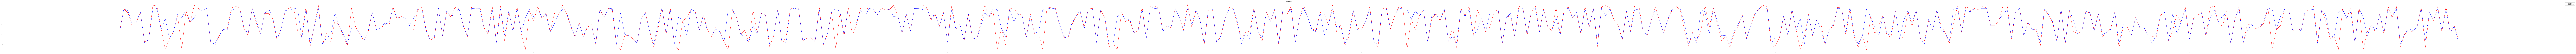

In [0]:
#plottin 
#has two of it for compearing
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
plt.figure(figsize=[500, 10])
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()


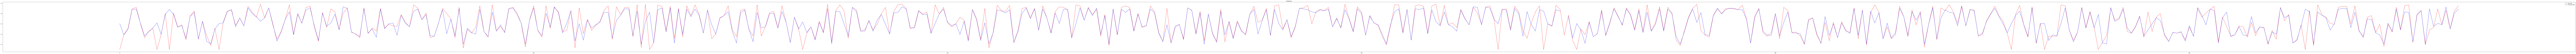

In [0]:
#plotting for relu activation
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
plt.figure(figsize=[500, 10])
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [0]:
#checking if there is any nan in predicted set
print(len(y_test))
print(len(y_pred))
for i, j in zip(y_test, y_pred):
    #print("{}    {}".format(i[0],j[0]))
    if math.isnan(j[0]):
        j[0] = i[0]
        print("{}    {}".format(i[0],j[0]))

566
566


In [0]:
import math
def rmse(a, b):
    s = 0
    for i,j in zip(a,b):
        #print(s)
        s = s + (i[0]-j[0])**2
        if math.isnan(s):
            #print("{}    {}".format(i[0], j[0]))
            print("Nan found")
            break
        #print("{}".format(i[0]-j[0]))
    #print(s)
    s = s/len(a)
    return math.sqrt(s)


#rmse([1,2,3,4], [3,4,5,6])

In [0]:
rmse(y_test, y_pred)

0.17412593424430176